In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

In [9]:
data = { 
    "Date": pd.date_range(start="2024-01-01", end="2024-01-20"), 
    "Value": [100, 102, 101, 104, 107, 110, 115, 113, 117, 119, 118, 120, 125, 130, 128, 135, 137, 140, 138, 142],
}


In [10]:
print (data)

{'Date': DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
               '2024-01-17', '2024-01-18', '2024-01-19', '2024-01-20'],
              dtype='datetime64[ns]', freq='D'), 'Value': [100, 102, 101, 104, 107, 110, 115, 113, 117, 119, 118, 120, 125, 130, 128, 135, 137, 140, 138, 142]}


In [12]:
series = data['Value']
print(series)

[100, 102, 101, 104, 107, 110, 115, 113, 117, 119, 118, 120, 125, 130, 128, 135, 137, 140, 138, 142]


In [15]:
model = ARIMA(series, order=(2, 1, 2)) # Example parameters (p, d, q)
model_fit = model.fit()

/Users/saifmahmud/bda74/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -44.720
Date:                Mon, 21 Jul 2025   AIC                             99.440
Time:                        22:45:57   BIC                            104.163
Sample:                             0   HQIC                           100.240
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3023      0.582      2.239      0.025       0.163       2.442
ar.L2         -0.3043      0.591     -0.515      0.606      -1.462       0.854
ma.L1         -1.9350     12.636     -0.153      0.8

In [7]:
#Forecasting
forecast = model_fit.forecast(steps=10) # Predict the next 10 steps
print(forecast)

[144.72857762 147.37382952 149.98864878 152.58918724 155.18038671
 157.76376874 160.33981129 162.90867387 165.47041881 168.02507874]


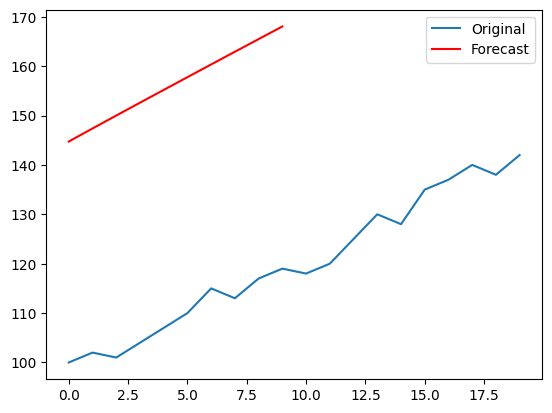

In [8]:
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [19]:
np.random.seed(42)
time_index = pd.date_range(start='2023-01-01', periods=60, freq='M')
trend = np.linspace(10, 20, 60)
seasonality = 5 * np.sin(np.linspace(0, 3 * np.pi, 60))
noise = np.random.normal(0, 1, 60)
data = trend + seasonality + noise

/var/folders/60/30jt49l93hv814nztk5pbnx00000gn/T/ipykernel_5721/2697722884.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range(start='2023-01-01', periods=60, freq='M')


In [20]:
time_series_df = pd.DataFrame({'Date': time_index, 'Value': data})
time_series_df.set_index('Date', inplace=True)
time_series_df

,Value
Date,
2023-01-31,10.496714
2023-02-28,10.826545
2023-03-31,12.557055
2023-04-30,14.336967
2023-05-31,13.425650
2023-06-30,14.195604
2023-07-31,16.687676
2023-08-31,16.450436
2023-09-30,15.673568


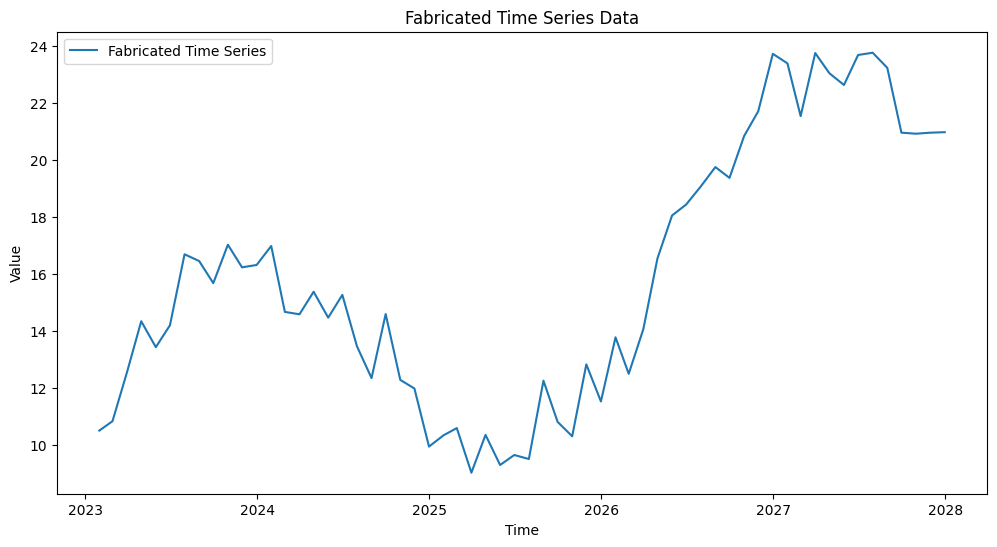

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(time_series_df, label='Fabricated Time Series')
plt.title('Fabricated Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [22]:
decompose_result = seasonal_decompose(time_series_df['Value'], model='additive', period=12)

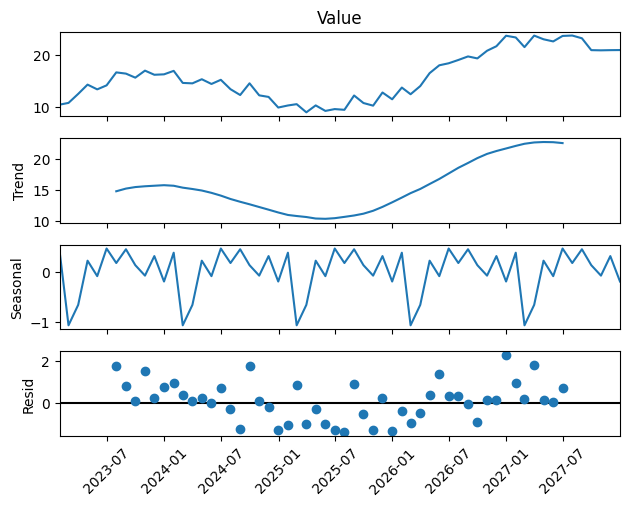

In [25]:
decompose_result.plot()
plt.xticks(rotation=45)
plt.show()

In [28]:
time_series_diff = time_series_df['Value'].diff().dropna()
print(time_series_diff)

Date
2023-02-28    0.329831
2023-03-31    1.730510
2023-04-30    1.779912
2023-05-31   -0.911317
2023-06-30    0.769955
2023-07-31    2.492071
2023-08-31   -0.237240
2023-09-30   -0.776868
2023-10-31    1.350180
2023-11-30   -0.794022
2023-12-31    0.082372
2024-01-31    0.667264
2024-02-29   -2.315437
2024-03-31   -0.083204
2024-04-30    0.790923
2024-05-31   -0.908611
2024-06-30    0.798631
2024-07-31   -1.803328
2024-08-31   -1.118833
2024-09-30    2.249866
2024-10-31   -2.312736
2024-11-30   -0.301094
2024-12-31   -2.040311
2025-01-31    0.396965
2025-02-28    0.253164
2025-03-31   -1.568243
2025-04-30    1.328295
2025-05-31   -1.057435
2025-06-30    0.351526
2025-07-31   -0.140521
2025-08-31    2.750387
2025-09-30   -1.445694
2025-10-31   -0.506834
2025-11-30    2.525566
2025-12-31   -1.302264
2026-01-31    2.252091
2026-02-28   -1.281516
2026-03-31    1.564865
2026-04-30    2.485341
2026-05-31    1.508675
2026-06-30    0.386439
2026-07-31    0.633023
2026-08-31    0.681976
2026-0

In [29]:
arima_model = ARIMA(time_series_df['Value'], order=(1, 1, 1))
arima_result = arima_model.fit()

/Users/saifmahmud/bda74/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/saifmahmud/bda74/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/Users/saifmahmud/bda74/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [32]:
arima_forecast = arima_result.forecast(steps=12)
print(arima_forecast)

2028-01-31    20.971904
2028-02-29    20.972681
2028-03-31    20.972515
2028-04-30    20.972550
2028-05-31    20.972543
2028-06-30    20.972544
2028-07-31    20.972544
2028-08-31    20.972544
2028-09-30    20.972544
2028-10-31    20.972544
2028-11-30    20.972544
2028-12-31    20.972544
Freq: ME, Name: predicted_mean, dtype: float64


In [33]:
ses_model = ExponentialSmoothing(time_series_df['Value'])
ses_fit = ses_model.fit(smoothing_level=0.2, optimized=False)
ses_forecast = ses_fit.forecast(steps=12)

/Users/saifmahmud/bda74/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [34]:
hw_model = ExponentialSmoothing(time_series_df['Value'], trend='add', seasonal='add', seasonal_periods=12)
hw_fit = hw_model.fit()
hw_forecast = hw_fit.forecast(steps=12)

/Users/saifmahmud/bda74/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [35]:
forecast_df = pd.DataFrame({ 
    'ARIMA Forecast': arima_forecast, 
    'SES Forecast': ses_forecast, 
    'HW Forecast': hw_forecast
})

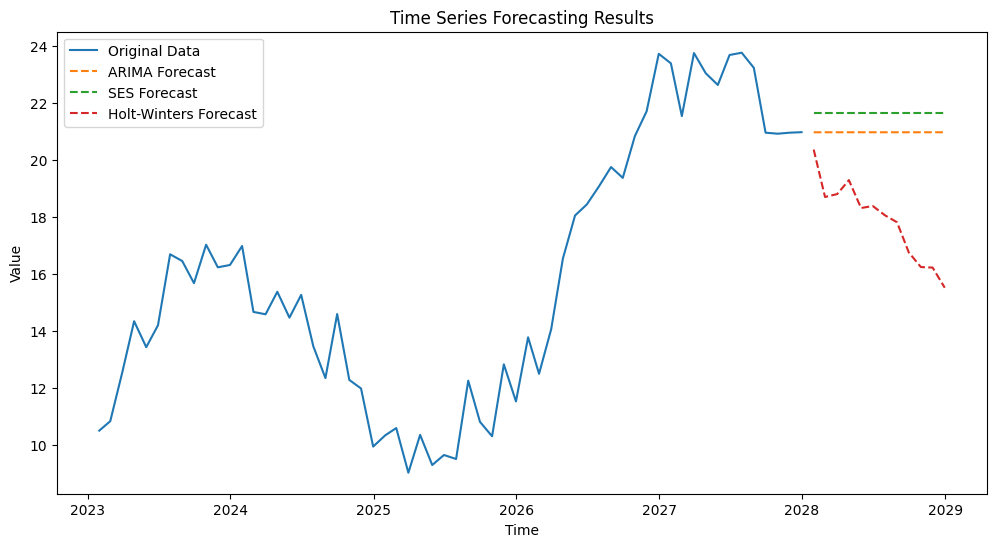

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(time_series_df, label='Original Data')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(ses_forecast, label='SES Forecast', linestyle='--')
plt.plot(hw_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Time Series Forecasting Results')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [38]:
forecast_df

,ARIMA Forecast,SES Forecast,HW Forecast
2028-01-31,20.971904,21.65133,20.364858
2028-02-29,20.972681,21.65133,18.699740
2028-03-31,20.972515,21.65133,18.802263
2028-04-30,20.972550,21.65133,19.291419
2028-05-31,20.972543,21.65133,18.311908
2028-06-30,20.972544,21.65133,18.383455
2028-07-31,20.972544,21.65133,18.058189
2028-08-31,20.972544,21.65133,17.812761
2028-09-30,20.972544,21.65133,16.755053
2028-10-31,20.972544,21.65133,16.239248
